dict_keys(['var', 'gt', 'rec', 'input', 'residual', 'mask'])


/Users/zizhao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


AttributeError: 'Figure' object has no attribute 'imshow'

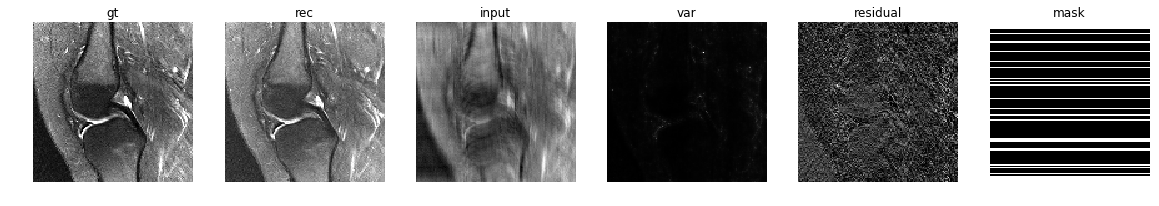

In [105]:
import pickle
import torch
import matplotlib.pyplot as plt
data = pickle.load(open('pickle_mri_results.pickle','rb'))
print(data.keys())

for i in range(6):
    plt.figure(figsize=(20,25))
    for j, k in enumerate(['gt','rec','input','var','residual', 'mask']):
        plt.subplot(1,6,j+1)
        plt.imshow(data[k][i][0], cmap='gray')
        plt.axis('off')
        plt.title(k)
        
    # show SSIM and SE Map
    gt = data['gt'][i,0]
    rec = data['rec'][i,0] 
    ssim_map, s = ssim(rec,gt, full=True, data_range=10)
    plt.subplot(1,6,4)
    fig = plt.figure()

    fig.imshow(s, vmin=0, vmax=1, cmap='gray')
    plt.title('pixel ssim [0,1]')
    mse = (gt - rec) ** 2
    plt.subplot(1,6,5)
    plt.imshow(mse / mse.max(), cmap='gray')
    plt.title(f'mse [{mse.min()}, {mse.max():.3f}]')
    

In [104]:
rec.max()

1.0

In [98]:
ssim_map

0.9307800932209553

In [6]:
import pickle
import torch
import matplotlib.pyplot as plt
data = pickle.load(open('pickle_mri_results.pickle','rb'))
print(data.keys())

for i in range(6):
    plt.figure(figsize=(20,25))
    for j, k in enumerate(['gt','rec','input','var','residual', 'mask']):
        plt.subplot(1,6,j+1)
        plt.imshow(data[k][i][0], cmap='gray')
        plt.axis('off')
        plt.title(k)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]

In [68]:
gt = data['gt'][0,0]
rec = data['rec'][0,0] 
from skimage.measure import compare_ssim as ssim
ssim_map, s = ssim(rec,gt,full=True)

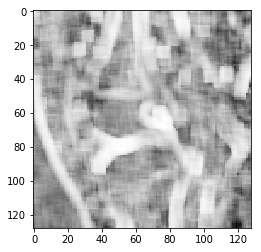

In [75]:
plt.imshow(s, cmap='gray')

In [80]:
s.min()

0.15558313322161288